In [1]:
# 五、神经网络逻辑回归
# 构建神经网络,结构如下
'''
隐藏层只设了一层
[输入层]    [隐藏层]    [输出层]
[A1]        [A2]       [A3]
            o
o           o           o
o           o
            o
'''

'\n隐藏层只设了一层\n[输入层]    [隐藏层]    [输出层]\n[A1]        [A2]       [A3]\n            o\no           o           o\no           o\n            o\n'

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 附:工具函数(复制使用)
# 绘制决策边界
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=np.squeeze(y), cmap=plt.cm.Spectral)    # show dataset points; y -> np.squeeze(y)


# 生成花瓣图形数据
def load_planar_dataset():
    np.random.seed(1)
    m = 400  # 样本数量
    N = int(m / 2)  # 每个类别的样本量
    D = 2  # 维度数
    X = np.zeros((m, D))  # 初始化X
    Y = np.zeros((m, 1), dtype='uint8')  # 初始化Y
    a = 4  # 花儿的最大长度

    for j in range(2):
        ix = range(N * j, N * (j + 1))
        t = np.linspace(j * 3.12, (j + 1) * 3.12, N) + np.random.randn(N) * 0.2  # theta
        r = a * np.sin(4 * t) + np.random.randn(N) * 0.2  # radius
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        Y[ix] = j

    return X, Y

In [4]:
# 加载数据
X_train, Y_train = load_planar_dataset()

# 设置超参数
learning_rate = 0.05
count = 10000
costs = []

# 设置网络结构
n_x = 2    # 输入层的节点数
n_h = 4    # 隐藏层的节点数
n_y = 1    # 输出层的节点数

In [5]:
# 1.定义神经网络的结构和前向传播的输出结果
W1 = tf.Variable(tf.random_normal([n_x, n_h], stddev=1, seed=1) * 0.01, name='weight1')
W2 = tf.Variable(tf.random_normal([n_h, n_y], stddev=1, seed=1) * 0.01, name='weight2')
b1 = tf.Variable(tf.zeros([1, n_h]), name='bias1')
b2 = tf.Variable(tf.zeros([1, n_y]), name='bias2')
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 前向传播
Z2 = tf.matmul(X, W1) + b1
A2 = tf.tanh(Z2)
Z3 = tf.matmul(A2, W2) + b2
y = tf.sigmoid(Z3)

In [6]:
# 2.定义损失函数以及选择反向传播优化的算法
loss = -tf.reduce_mean(Y * tf.log(tf.clip_by_value(y, 1e-10, 1.0))
                      + (1 - Y) * tf.log(tf.clip_by_value(1 - y, 1e-10, 1.0)))
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [7]:
# 3.生成会话并且在训练数据上反复运行反向传播优化算法
# with tf.Session() as sess:    # 后面画图需要sess,暂时不close
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(count):
    _, _cost = sess.run([train_step, loss], feed_dict={X:X_train, Y:Y_train})
    costs.append(_cost)

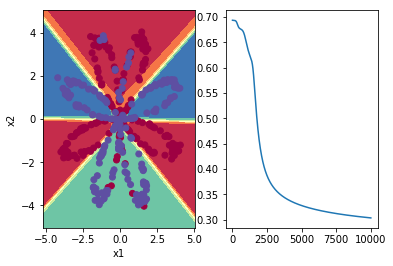

神经网络逻辑归回的准确率为:88.250000


In [8]:
# 绘图
# 边界图
plt.subplot(1,2,1)
plot_decision_boundary(lambda x:sess.run(y, feed_dict={X:x}), X_train.T, Y_train.T)   # 边界是用等高线绘制的
# 迭代代价图
plt.subplot(1,2,2)
plt.plot([x for x in range(count)], costs)
plt.show()
# 显示准确率
predicted = np.round(sess.run(y, feed_dict={X:X_train}))    # 预测
predicted = predicted.astype(np.int)
print('神经网络逻辑归回的准确率为:%f' % (np.mean(np.equal(Y_train, predicted)) * 100))
sess.close()    # 最后手动关闭